# SARIMA modeling


## Goals
- Extend understanding from ARMA models to SARIMA (Seasonal AutoRegressive Integrated Moving Average) models
  - time trends
  - seasonal dummies
  - seasonal auto aggressive 
  - moving average components
  - differencing into unified framework
- Experiment with pmdarima package

## Theoretical Aspects

### Extending ARMA Models - Time trends

- Interested in forecasting h step-ahead forecast(multiple horizon T+1, T+2, .. T+h) given information available at time T
($X_{T+h|T}$)

$$
X_t = T_t + S_t + C_t + \epsilon_t
$$
- $T_t$ - Trend
- $S_t$ - Seasonal - deterministic
- $C_t$ - Cyclical - ARMA component
- $\epsilon$ - white noise

#### Time trends

- A basic trend model

$$
X_t + \beta_0 + \beta_1t + \epsilon_t
$$
- A cross sectional regression model

$$
X_t + \beta_0 + \beta_1t + \beta_2t^2 + \epsilon_t
$$
  - quadratic or higher terms are rarely used
  - or if used their impact is monitored carefully
  - log terms are generally used instead of X itself
  
#### Exponential trends
- Models estimated in logs have exponential trends

$$
\ln X_t + \beta_0 + \beta_1t + \epsilon_t
$$
- $\beta_1$ is the growth rate of $X_t$

$$
X_t = \beta_0 \exp(\beta_1t)\epsilon_t
$$
- can use simple trend model using OLS

#### Forecasting
- Trend forecasting is simple

$$
X_t + \beta_0 + \beta_1t + \epsilon_t
$$
- Forecast will be

$$
E_T[X_{T+h}] = \hat{X}_{T+h|T} = \beta_0 + \beta_1{(T+h)} 
$$
- Generally interested in prediction intervals (eg 95%)

$$ 
PI = [\hat{X}_{T+h|T} - 1.96\sigma, \hat{X}_{T+h|T} + 1.96\sigma] 
$$
  - assuming errors are normally distributed

#### Forecasting exponential trends
- Assumption

  - $\epsilon_t \overset{\text{i.i.d.}}{\sim} N(0, \sigma^2)$
  
  - forecast variable is log-normal
- Mean

$$
\ln \hat{X}_{T+h|T} \sim N(\beta_0 + \beta_1{(T+h)}, \sigma^2) \implies \hat{X}_{T+h|T} \sim \text{LogNormal}(\beta_0 + \beta_1{(T+h)}, \sigma^2) 
$$
- 2 ways of forecasting
  - Median as it is normally distributed
  
    - $\hat{X}_{T+h|T} = \exp(\beta_0 + \beta_1{(T+h)})$
    
    - this method is simple, 
    - doesnot require any knowledge about the variance
    - more common than the mean method
  - Mean method
    - Jensen's inequality
    - as exp(.) is a convex function
- Prediction intervals (eg 95%) is simple

$$ 
PI = [\exp(\beta_0 + \beta_1{(T+h)} - 1.96\sigma), \exp(\beta_0 + \beta_1{(T+h)} + 1.96\sigma)] 
$$
  - Symmetric in logs, asymetric in levels
  - Forecasting logs is very common
    - by differencing we get growth rate
    - use when the series is strictly positive

### Seasonality
- Pure seasonal model

$$
X_t = S_t + \epsilon_t
$$
- Seasonal pattern repeats every m observations
- different frequencies
- completely predictable

#### Seasonal dummies

$$
X_t = \sum\limits_{i=1}^{m}\gamma_iI_{[S_m(t)=i]} + \epsilon_t
$$
- dummy variables for each season 
  - use indicator function
  - $S_m(t) = t - m\lfloor(t-1)/m\rfloor $
    - this returns values from 1,..,m
  - $\gamma_i$ - for each period there is a different coeff
    - allows regular variation that depends on that season only
  - m seasonal dummies
- Multiplicative seasonalities using additive decomposition

$$
X_t = \sum\limits_{i=1}^{m_1}\gamma_iI_{[S_{m_{1}}(t)=i]} + \sum\limits_{j=2}^{m_2}\delta_jI_{[S_{m_{2}}(t)=j]} + \epsilon_t
$$

  - $m_2 \gt m_1$ 
  - $m_2$ is not an integer multiple of $m_1$ 
  - must drop one dummy when using multiple seasons

#### Estimation
- generally use OLS
- combine with time trends

$$
X_t = \beta_1t + \beta_2t^2 + \sum\limits_{i=1}^{m}\gamma_iI_{[S_m(t)=i]} + \epsilon_t
$$

- Restricted

$$
X_t = \beta_0 + \epsilon_t
$$

- Unrestricted

$$
X_t = \beta_0 + \sum\limits_{i=1}^{m-1}\gamma_iI_{[S_m(t)=i]} + \epsilon_t
$$

- F-test only depends on the unrestricted R-squared
  - in this case, as there is no time trends, restricted R-squared is zero
  
#### ?? Restricted/Unrestricted seasonality ANOVA

#### Forecasting and Prediction Intervals
- Forecasts are simple

$$
\hat{X}_{T+h|T} = \beta_1t + \beta_2t^2 + \gamma S_m(T+h) 
$$

- Prediction intervals (eg 95%) is standard

$$
PI = [\hat{X}_{T+h|T} - 1.96\sigma, \hat{X}_{T+h|T} + 1.96\sigma] 
$$

- If modeling $\ln X_t$, use mean or median forecast

#### ?? Fourier Series for seasonality

- https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a

### Seasonal MA
#### MA models
- General MA(1) series
$$X_t = (1+\theta_1L)\epsilon_t = \epsilon_t + \theta_1L\epsilon_t = \epsilon_t + \theta_1\epsilon_{t-1}$$
- Seasonal MA(1)x(1) series
$$ \begin{equation} \\
\begin{aligned}\\
X_t &= (1+\theta_1L)(1+\theta_mL^m)\epsilon_t \\
 &= (1+\theta_1L +\theta_mL^m + \theta_1\theta_mL^{m+1})\epsilon_t \\
 &= \epsilon_t +\theta_1\epsilon_{t-1} +\theta_m\epsilon_{t-m} + \theta_1\theta_m\epsilon_{t-m-1} \\
\end{aligned}\\
\end{equation} $$
  - 1st line
    - 2nd term $(1+\theta_mL^m)$ has a lag of seasonal frequency
  - 2nd line
    - $\theta_1\theta_mL^{m+1}$ is a restricted term

#### Prediction Interval in MA models
- Prediction intervals for MA process
$$X_t = \mu + \sum\limits_{i=1}^{Q} \theta_i \epsilon_{t-i} + \epsilon_{t} $$
- h-step error
$$X_{T+h} - \hat{X}_{T+h|T} = \epsilon_{T+h} + \sum\limits_{i=1}^{min(h-1, Q)} \theta_i \epsilon_{T+h-i} $$
- variance of forecast error
$$\sigma^2_h = \sigma^2 \left( 1 + \sum\limits_{i=1}^{min(h-1, Q)} \theta^2_i \right) $$
- Prediction intervals
$$\big[ \hat{X}_{T+h|T} \pm 1.96\sigma_h \big]$$
  - $\sigma_h $ ahead volatility
  
#### MA Invertibility and Prediction

#### Summary
- Optimal forecast in MA models only depends on observed data
- this happens by inverting MA into AR
- Seasonal MA are constructed using the exact same methods as seasonal auto regressions by constructing products of lag polynomials where lags are there both at seasonal frequency and at time series frequency

### Seasonal Autoregression
#### Lag operator 
- Lag operator L is essential to understanding seasonal ARMAs
- Key properties

$$\begin{aligned}
LX_t &= X_{t-1} \\
L^2X_t &= L(LX_{t}) = LX_{t-1} = X_{t-2} \\
L^pL^qX_t &= L^{p+q}X_t = X_{t-(p+q)} \\
\end{aligned}$$

- Lag polynomials
  - AR(1)
$$\begin{aligned}
X_t &= \phi_0 + \phi_1X_{t-1} + \epsilon_t \\
X_t - \phi_1X_{t-1} &= \phi_0 + \epsilon_t \\
X_t - \phi_1LX_{t} &= \phi_0 + \epsilon_t \\
(1 - \phi_1L)X_{t} &= \phi_0 + \epsilon_t \\
\end{aligned}$$
  - AR(p)
$$\begin{aligned}
(1 - \phi_1L - \phi_2L^2 - ... - \phi_pL^p)X_{t} &= \phi_0 + \epsilon_t \\
X_t &= \phi_0 + \phi_1X_{t-1} + \phi_2X_{t-2} + ... + \phi_pX_{t-p} + \epsilon_t \\
\end{aligned}$$

#### Seasonal AR models
- Pure seasonal AR
$$\begin{aligned}
(1 - \phi_mL^m)X_{t} &= \phi_0 + \epsilon_t \\
X_t &= \phi_0 + \phi_mX_{t-m} + \epsilon_t \\
\end{aligned}$$
  - m is the seasonal period of series
  - such model is not plausible because it will have m unrelated AR1 models combined together
  - what we need is to include short run dynamics
- Seasonal AR with short-run dynamics
$$\begin{aligned}
(1 - \phi_1L)(1 - \phi_mL^m)X_{t} &= \phi_0 + \epsilon_t \\
(1 - \phi_1L - \phi_mL^m + \phi_1\phi_mL^{(m+1)})X_{t} &= \phi_0 + \epsilon_t \\
X_t &= \phi_0 + \phi_1X_{t-1} + \phi_mX_{t-m} - \phi_1\phi_mX_{t-m-1} + \epsilon_t \\
\end{aligned}$$
  - $\phi_1LX_{t}$ - AR(1) term
  - $\phi_mL^mX_{t}$ - AR(m) seasonal term
  - $\phi_1\phi_mL^{(m+1)}X_{t}$ - extra term in seasonal AR model
  - Restricted AR(m+1) in two ways
    - lot of terms missing $\phi_2$, $\phi_3$, ..., $\phi_{m-1}$ 
    - negative $\phi_1\phi_mL^{(m+1)}X_{t}$ - extra term
  - SAR(1)x(1)
    - 1st term (1) is the short run dynamics
    - 2nd term (1) is the seasonal dynamics
    
#### Ignoring the restriction
- can also estimate Unrestricted model as
$$ X_t = \phi_0 + \phi_1X_{t-1} + \phi_mX_{t-m} + \phi_{m+1}X_{t-m-1} + \epsilon_t $$
  - ignore the restriction term
  - much easier as it can be estimated using OLS, because we can then include
    - time trends
    - seasonal dummies
    - Fourier trends
    - SAR terms
    - and can estimate all using OLS
  - restricted model requires a constrained estimator as Non-Linear Least square(NLLS) where $\phi_{m+1} = - \phi_{1}\phi_{m}$
    - more complex
    
#### Prediction Intervals
- In SAR models prediction intervals are not constant
- In earlier models, the prediction intervals are constant for time trends or seasonality
  - but not for cyclical component
- For SAR it depends on the horizon, on the model parameters and also on the model specification

#### Random Walks with Seasonality
- A seasonal random walk has unit root at seasonal frequency
$$(1-L^m)X_t = \epsilon_t$$
  - coefficient is 1 or unit root here
- Add short run dynamics to make is plausible
$$(1-\phi_1L)(1-L^m)X_t = \epsilon_t$$
  - short run dynamics is combined with seasonal unit root
- Seasonal unit roots need `seasonal differencing`
$$\Delta_mX_t = X_t - X_{t-m}$$
  - interested in seasonal growth rather than short run growth
- Note that $\Delta^m$ and $\Delta_m$ are different
$$\begin{aligned}
\Delta^mX_t &= \Delta(\Delta^{m-1})X_t = \Delta(\Delta(\Delta(...(\Delta X_t)))) \\
\Delta_mX_t &= X_t - X_{t-m} \\
\Delta^2X_t &= \Delta(X_t - X_{t-1}) = X_t - 2X_{t-1} + X_{t-2} \\
\Delta_2X_t &= X_t -  X_{t-2} \\
\end{aligned}$$

#### Seasonal Differencing
- Seasonal difference removes seasonal unit root
$$\Delta_mX_t = X_t - X_{t-m} = (1-L^m)X_t $$
- Applying seasonal differencing term, we get
$$\begin{aligned}
(1-\phi_1L)(1-L^m)X_t &= \epsilon_t \\
(1-\phi_1L)\Delta_mX_t &= \epsilon_t \\
\Delta_mX_t &= \phi_1\Delta_mX_{t-1} + \epsilon_t \\
\tilde{X}_t &= \phi_1\tilde{X}_{t-1} + \epsilon_t \\
\end{aligned}$$
  - Remember the seasonal differencing term in forecasts
  - there is no need of using seasonal differencing
    - if we had a dummy that happens every fourth quarter, when we take difference of a fourth quarter with the previous fourth quarter, then the level shift will be lost


### SARIMA Models
#### Seasonal ARMA
- Seasonal ARMA$(P,Q)\text{x}(P_s,Q_s)$
  - $(P,Q)$ corresponds the time series lag
  - $(P_s,Q_s)$ corresponds the seasonal lag
- Seasonal ARMA$(1,1)\text{x}(1,1)$
$$(1-\phi_1L)(1-\phi_mL^m)X_t = (1+\theta_1L)(1+\theta_mL^m)\epsilon_t$$

#### Incorporate the differencing parameter
- SARIMA - Seasonal Autoregression Integrated Moving Average
$$(P,D,Q)\text{x}(P_s,D_s,Q_s)$$
  - $D$ - standard differencing operator
    - $\Delta X_t$
  - $D_s$ - seasonal differencing operator
    - $\Delta_m X_t$
  - generally $D$ or $D_s$ is either 
    - both 0 or 
    - either one is 0 and other 1
    
#### Forecasting
- order of integration matters for forecasting and prediction intervals
- for non-seasonal differenced series
$$\hat{X}_{T+h|T} = X_T + \sum\limits_{i=1}^{h}E_T\left[\Delta X_{T+i} \right]$$
- Prediction intervals have the form
$$PI = \left[ \hat{X}_{T+h|T} \pm 1.96 \tilde{\sigma}_h \right]$$
  - where
$$\tilde{\sigma}^2_{h} = \sigma^2_{h} \sum\limits_{i=1}^{h}\left( 1 + \sum\limits_{j=1}^{i} \xi_j \right)^2$$

#### Forecasting with Seasonal Differencing
- we model $\Delta_mX_t$
$$\begin{aligned} \\
E\left[X_{T+1}\right] &= X_{T+1-m} + E_T\left[\Delta_m X_{T+1}\right] \\
&= X_{T+1-m} + E_T\left[ X_{T+1} \right] + E_T\left[ X_{T+1-m} \right] \\
&= E_T\left[ X_{T+1|T} \right] + X_{T+1-m} - X_{T+1-m|T} \\
&= E_T\left[ X_{T+1|T} \right] \\
\end{aligned}$$
  - Go back m periods from the time to forecast
  - Add to that the change and the forecast horizon $E_T\left[\Delta_m X_{T+1}\right]$ which is 1-step from model
  
- Generally,
$$\hat{X}_{T+h|T} = X_{T+1-m} + \sum\limits_{i=1}^{h}E_T \left[ \Delta_m X_{T+h|T} \right]$$

#### Complete Model
- Start by transforming $X_t$
  - Log or level
  - Level, Difference, or Seasonal Difference
$$\begin{aligned}
Y_t &= \text{Constant} \\
&+ \text{Trend} \\
&+ \text{Seasonal Dummies} \\ 
&+ \text{AR} + \text{Seasonal AR} \\
&+ \text{MA} + \text{Seasonal MA} + \epsilon_t \\
\end{aligned}
$$
  - All the terms other than MA or Seasonal MA are common
    - and can be estimated using OLS
  - MA or Seasonal MA make the estimation difficult
- Recommendations for forecasting
  - most of forecast component must come from trends and seasonal dummy
  - AR components should more or less run out by then
    - especially for long horizon forecast
    - for short horizon, they will play role
  - for differencing, the rule of thumb is, if you are close to unit root
    - use Augmented Dickey-Fuller test or some other
    - even if you are close to unit root say like 0.9 or 0.95 or less
      - estimate model using differences

## Practical Aspects

### Import Packages

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats
import seaborn as sns
sns.set_style("darkgrid")
# These values are optimized for full-screen on a high-resolution monitor
# plt.rc("figure", figsize=(32,12))
# plt.rc("font", size=28)
# plt.rc("lines", linewidth=4)

import warnings
warnings.filterwarnings('ignore')

### Load Data

<Figure size 864x432 with 0 Axes>

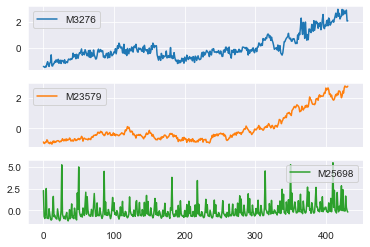

In [29]:
# df: pd.DataFrame = pd.read_hdf("./monthly-data.h5", f"nobs_432")
df = pd.read_hdf("./monthly-data.h5", f"nobs_432")
data = df[["M3276","M23579","M25698"]]
data.index = np.arange(data.shape[0])
fig = plt.figure(figsize=(12, 6))
std_data = (data - data.mean()) / data.std()
plts = std_data.plot(subplots=True)
# plt.savefig('./images/datatrends.png')
# plt.close();
plt.show();

### Non-seasonal modeling

In [6]:
# len(y)
432/6

72.0

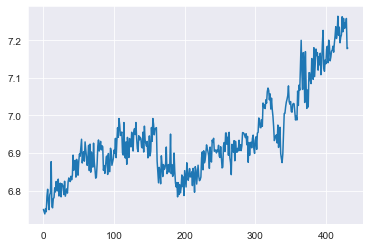

In [7]:
y = np.log(data["M3276"])
_ = y.plot()
# plt.savefig('./images/datatrends02_nonseasonal.png')
# plt.close();
plt.show();

### Time Trend and AR(1)

$$ Y_t = \delta_0 + \delta_1 t + \phi Y_{t-1} + \epsilon_t $$

In [8]:
ar1_trend = SARIMAX(y, order=(1,0,0), trend="ct").fit(maxiter=250)
ar1_trend.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.91726D+00    |proj g|=  2.45479D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.455D+02  -1.917D+00
  F =  -1.9172630741791070     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 828.258
Date:                Sat, 01 Oct 2022   AIC                          -1648.515
Time:                        21:16:17   BIC                          -1632.242
Sample:                             0   HQIC                         -1642.091
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8916      0.166      5.376      0.000       0.567       1.217
drift       9.836e-05    2.3e-05      4.271      0.000    5.32e-05       0.000
ar.L1          0.8686      0.024     35.550      0.000       0.821       0.917
sigma2         0.0013   8.38e-05     15.075      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  49.78   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               1.31   Skew:                             0.14
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(1,1) with a Trend

$$ Y_t = \delta_0 + \delta_1 t + \phi Y_{t-1} + \theta \epsilon_{t-1} + \epsilon_t $$

In [9]:
y = np.log(data["M3276"])
arma11_trend = SARIMAX(y, order=(1,0,1), trend="ct").fit(maxiter=250)
arma11_trend.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01805D+00    |proj g|=  1.55899D+03


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     44      2     0     0   1.262D+03  -2.018D+00
  F =  -2.0180983396934171     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 871.818
Date:                Sat, 01 Oct 2022   AIC                          -1733.637
Time:                        21:16:18   BIC                          -1713.295
Sample:                             0   HQIC                         -1725.606
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3852      0.088      4.385      0.000       0.213       0.557
drift       4.312e-05   1.11e-05      3.901      0.000    2.15e-05    6.48e-05
ar.L1          0.9433      0.013     72.878      0.000       0.918       0.969
ma.L1         -0.5243      0.040    -13.111      0.000      -0.603      -0.446
sigma2         0.0010    6.6e-05     15.096      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.65   Prob(JB):                         0.51
Heteroskedasticity (H):               1.49   Skew:                             0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Information Criteria: AIC, BIC & HQIC

The ICs are designed so that lower values indicate a model that fits better, controlling for the number of parameters. We see that ARMA(1,1) has a much lower BIC than that AR(1).

In [10]:
pd.DataFrame([[ar1_trend.aic, ar1_trend.hqic, ar1_trend.bic],
              [arma11_trend.aic, arma11_trend.hqic, arma11_trend.bic]],
            columns=["AIC", "HQIC", "BIC"], index=["AR(1)", "ARMA(1,1)"])


,AIC,HQIC,BIC
AR(1),-1648.515296,-1642.090503,-1632.241594
"ARMA(1,1)",-1733.636965,-1725.605974,-1713.294838


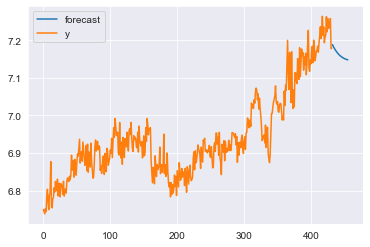

In [11]:
def plot_forecast(y, forecast, tail=None):
    df = pd.DataFrame({"forecast":pd.Series(list(np.nan * y) + list(forecast)),
                   "y": y})
    if tail is not None:
        df = df.tail(tail)
    df.plot()

plot_forecast(y, arma11_trend.forecast(24))
# plt.savefig('./images/datatrends03_ARMA11_forecast.png')
# plt.close();
plt.show();

### ARIMA(1, 1, 1)

$$ \begin{align*} 
(1-\phi_1 L) (1-L) Y_t = & \delta_0 \theta \epsilon_{t-1} + \epsilon_t \\
\Delta Y_t = & \delta_0 + \phi \Delta Y_{t-1} + \theta \epsilon_{t-1} + \epsilon_t \\
\end{align*}
$$

$\Delta Y_t$ is used since $d=1$.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01907D+00    |proj g|=  3.12568D+00

At iterate    5    f= -2.02078D+00    |proj g|=  1.18442D-01

At iterate   10    f= -2.02103D+00    |proj g|=  2.32532D-01

At iterate   15    f= -2.02105D+00    |proj g|=  3.97098D-02

At iterate   20    f= -2.02124D+00    |proj g|=  2.78793D-01

At iterate   25    f= -2.02130D+00    |proj g|=  1.64644D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     32      1     0     0   

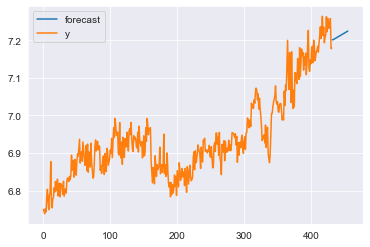

In [12]:
arima_111 = SARIMAX(y, order=(1, 1, 1), trend="c").fit(maxiter=250)
arima_111.summary()
plot_forecast(y, arima_111.forecast(24))
# plt.savefig('./images/datatrends04_ARIMA111_forecast.png')
# plt.close();
plt.show();

### ARIMA(0, 1, 1)

$$ \Delta Y_t = \delta_0 +  \theta \epsilon_{t-1} + \epsilon_t $$

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01784D+00    |proj g|=  5.09688D+00

At iterate    5    f= -2.02089D+00    |proj g|=  2.90026D-03


 This problem is unconstrained.



At iterate   10    f= -2.02089D+00    |proj g|=  7.15942D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   3.526D-03  -2.021D+00
  F =  -2.0208950364025480     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


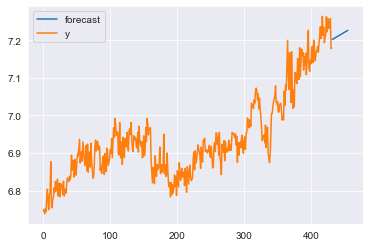

In [13]:
arima_011 = SARIMAX(y, order=(0, 1, 1), trend="c").fit(maxiter=250)
arima_011.summary()
plot_forecast(y, arima_011.forecast(24))
# plt.savefig('./images/datatrends05_ARIMA011_forecast.png')
# plt.close();
plt.show();

### ARIMA(0,1,1) without a constant

$$ \Delta Y_t =  \theta \epsilon_{t-1} + \epsilon_t $$


In [14]:
arima_011_nc = SARIMAX(y, order=(0, 1, 1), trend="n").fit(maxiter=250)
arima_011_nc.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01791D+00    |proj g|=  1.05404D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     10      1     0     0   8.482D-04  -2.018D+00
  F =  -2.0182051803877363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 871.865
Date:                Sat, 01 Oct 2022   AIC                          -1739.729
Time:                        21:16:22   BIC                          -1731.597
Sample:                             0   HQIC                         -1736.518
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5494      0.034    -16.363      0.000      -0.615      -0.484
sigma2         0.0010   6.71e-05     15.260      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.62   Prob(JB):                         0.71
Heteroskedasticity (H):               1.48   Skew:                             0.05
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

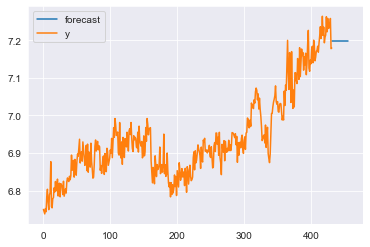

In [15]:
plot_forecast(y, arima_011_nc.forecast(24))
# plt.savefig('./images/datatrends06_ARIMA011_nconstant_forecast.png')
# plt.close();
plt.show();

### Seasonal

We finally show how to fit models with seasonal dummies and using seasonal differencing.

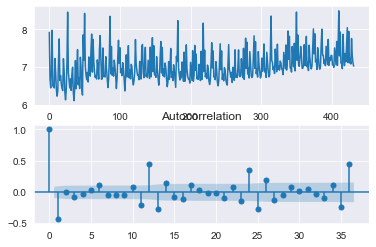

In [16]:
y = np.log(data["M25698"])
fig, axes = plt.subplots(2, 1)
y.plot(ax=axes[0])
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
_ = plot_acf(y.diff().dropna(), lags=36, ax=axes[1])
# plt.savefig('./images/datatrends07_seasonal_diff.png')
# plt.close();
plt.show();

### Constructing Seasonal Dummies

Seasonal dummies are easy to build using `pd.get_dummies` and a `categorical` Series. The categorical series is used to store categorical data. We first construct the seasonal indicators using $\!\!\mod(t,12)$ for each time period. It is easiest to construct the dummies for both the in-sample and the out-of-sample periods, which is why it is `y.shape[0] + 24`.

In [17]:
seasonals = np.arange(y.shape[0] + 24)
seasonals = seasonals % 12
seasonals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9

`pd.get_dummies` takes the argument `drop_first` which lets us avoid the dummy variable trap. 

In [18]:
from pandas import get_dummies
dummies = get_dummies(pd.Series(seasonals, dtype="category"), drop_first=True)
dummies.columns = [f"s{i}" for i in range(2, 13)] 
dummies.head(14)

,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


### ARIMA(1, 0, 0) with seasonal dummies

$$ Y_t = \delta_0 + \delta_1 t + \phi Y_{t-1} + \sum_{i=2}^{12} \gamma_i I_{S_i} + \epsilon_t $$

In [19]:
ar1_seasonal_dummies = SARIMAX(y, exog=dummies.iloc[:y.shape[0]], order=(1, 0 , 0), trend="c").fit(maxiter=250)
ar1_seasonal_dummies.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.07737D+00    |proj g|=  1.69168D-02

At iterate    5    f=  1.83179D+00    |proj g|=  4.61423D-01

At iterate   10    f=  1.42368D+00    |proj g|=  5.68917D-01

At iterate   15    f=  9.82987D-01    |proj g|=  1.37736D-01

At iterate   20    f=  8.03106D-01    |proj g|=  1.83614D-01

At iterate   25    f=  7.43827D-01    |proj g|=  2.99305D-02

At iterate   30    f=  7.33082D-01    |proj g|=  1.05074D-01

At iterate   35    f=  7.20606D-01    |proj g|=  1.46521D-01

At iterate   40    f=  6.88702D-01    |proj g|=  2.60584D-01

At iterate   45    f=  6.18202D-01    |proj g|=  4.67291D-01

At iterate   50    f=  5.52676D-01    |proj g|=  1.44479D-01

At iterate   55    f=  5.04892D-01    |proj g|=  1.89259D-01

At iterate   60    f=  4.50515D-01    |proj g|=  4.10629D-01

At iterate   65    f=  4.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 M25698   No. Observations:                  432
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -107.374
Date:                Sat, 01 Oct 2022   AIC                            242.749
Time:                        21:16:31   BIC                            299.706
Sample:                             0   HQIC                           265.235
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7938      0.303     15.824      0.000       4.200       5.388
s2             0.2558      0.070      3.644      0.000       0.118       0.393
s3             0.6806      0.056     12.070      0.000       0.570       0.791
s4             0.1153      0.082      1.398      0.162      -0.046       0.277
s5             0.4812      0.068      7.051      0.000       0.347       0.615
s6            -0.1100      0.115     -0.960      0.337      -0.334       0.114
s7            -0.0324      0.137     -0.237      0.813      -0.300       0.235
s8            -0.1780      0.125     -1.419      0.156      -0.424       0.068
s9             0.3662      0.102      3.584      0.000       0.166       0.566
s10            0.1346      0.176      0.764      0.445      -0.211       0.480
s11           -0.1602      0.112     -1.434      0.152      -0.379       0.059
s12            0.0496      0.056      0.884      0.377      -0.060       0.159
ar.L1          0.3062      0.044      7.035      0.000       0.221       0.392
sigma2         0.0962      0.005     17.547      0.000       0.085       0.107
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                48.05
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
forecast = ar1_seasonal_dummies.forecast(24, exog=dummies.iloc[y.shape[0]:])
forecast

432    6.928095
433    7.171353
434    7.592225
435    7.025758
436    7.391316
437    6.800052
438    6.877592
439    6.731928
440    7.276105
441    7.044570
442    6.749713
443    6.959526
444    6.909953
445    7.165797
446    7.590524
447    7.025237
448    7.391157
449    6.800003
450    6.877577
451    6.731924
452    7.276104
453    7.044569
454    6.749713
455    6.959526
Name: predicted_mean, dtype: float64

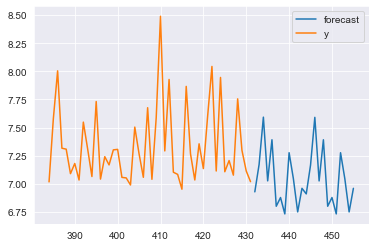

In [21]:
plot_forecast(y, forecast, 72)
# plt.savefig('./images/datatrends08_ar1_forecast.png')
# plt.close();
plt.show();

### SARIMA$(0,0,0)\times(0,1,0)_{12}$


Finally we fit a SARIMA with a single difference.  Note that the only free parameter is the constant in the model.

$$ \Delta_{12} Y_t = \delta_0 + \epsilon_t $$


In [22]:
arima_000_010 = SARIMAX(y,order=(0,0,0), seasonal_order=(0, 1,0, 12), trend="c").fit()
arima_000_010.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.87905D-01    |proj g|=  5.80985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      9      1     0     0   5.903D-05   4.879D-01
  F =  0.48790472738224799     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                   M25698   No. Observations:                  432
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -210.775
Date:                  Sat, 01 Oct 2022   AIC                            425.550
Time:                          21:16:32   BIC                            433.630
Sample:                               0   HQIC                           428.743
                                  - 432                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0152      0.020      0.780      0.436      -0.023       0.054
sigma2         0.1597      0.005     30.443      0.000       0.149       0.170
===================================================================================
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):               822.89
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
forecast = arima_000_010.forecast(24)
forecast

432    7.150139
433    7.617987
434    8.058335
435    7.128758
436    7.960502
437    7.122053
438    7.221591
439    7.091860
440    7.770104
441    7.312457
442    7.128882
443    7.033996
444    7.165366
445    7.633214
446    8.073563
447    7.143986
448    7.975729
449    7.137280
450    7.236819
451    7.107087
452    7.785331
453    7.327685
454    7.144109
455    7.049223
Name: predicted_mean, dtype: float64

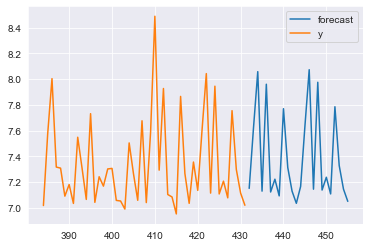

In [24]:
plot_forecast(y, forecast, 72)
# plt.savefig('./images/datatrends09_sarima_single_diff_forecast.png')
# plt.close();
plt.show();

### pmdarima

Automatically created module for IPython interactive environment
pmdarima version: 1.8.5
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=261.587, Time=3.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=522.367, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=401.618, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=260.626, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=520.377, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=257.600, Time=2.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=259.024, Time=2.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=260.318, Time=1.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=257.045, Time=2.73 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=258.163, Time=3.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=260.904, Time=3.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=257.086, Time=1.28 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 25.425 seconds
Model fit:

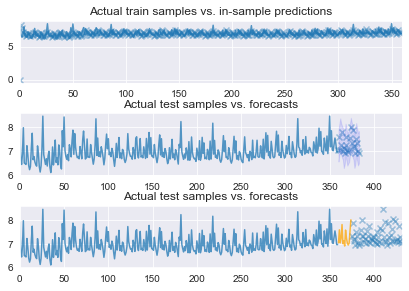

In [25]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import numpy as np
import pmdarima as pm
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima
from matplotlib import pyplot as plt

print("pmdarima version: %s" % pm.__version__)

# Load the data and split it into separate pieces
# data = pm.datasets.load_wineind()
# train, test = model_selection.train_test_split(data, train_size=150)
data = y.copy()
train, test = model_selection.train_test_split(data, train_size=360)

# Let's create a pipeline with multiple stages... the Wineind dataset is
# seasonal, so we'll include a FourierFeaturizer so we can fit it without
# seasonality
pipe = pipeline.Pipeline([
    ("fourier", ppc.FourierFeaturizer(m=12, k=4)),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False,  # because we use Fourier
                              suppress_warnings=True))
])

pipe.fit(train)
print("Model fit:")
print(pipe)

# We can compute predictions the same way we would on a normal ARIMA object:
# preds, conf_int = pipe.predict(n_periods=10, return_conf_int=True)
preds, conf_int = pipe.predict(n_periods=24, return_conf_int=True)
print("\nForecasts:")
print(preds)

# Let's take a look at the actual vs. the predicted values:
# fig, axes = plt.subplots(3, 1, figsize=(12, 8))
fig, axes = plt.subplots(3, 1)
fig.tight_layout()

# Visualize goodness of fit
in_sample_preds, in_sample_confint = \
    pipe.predict_in_sample(X=None, return_conf_int=True)

n_train = train.shape[0]

x0 = np.arange(n_train)
axes[0].plot(x0, train, alpha=0.75)
axes[0].scatter(x0, in_sample_preds, alpha=0.4, marker='x')
# axes[0].fill_between(x0, in_sample_confint[:, 0], in_sample_confint[:, 1],
#                      alpha=0.1, color='b')
# axes[0].fill_between(x0, 5, 10,
#                      alpha=0.1, color='b')
axes[0].set_title('Actual train samples vs. in-sample predictions')
axes[0].set_xlim((0, x0.shape[0]))

# Visualize actual + predicted
x1 = np.arange(n_train + preds.shape[0])
axes[1].plot(x1[:n_train], train, alpha=0.75)
# axes[1].scatter(x[n_train:], preds, alpha=0.4, marker='o')
axes[1].scatter(x1[n_train:], test[:preds.shape[0]], alpha=0.4, marker='x')
axes[1].fill_between(x1[n_train:], conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')
axes[1].set_title('Actual test samples vs. forecasts')
axes[1].set_xlim((0, data.shape[0]))

# We can also call `update` directly on the pipeline object, which will update
# the intermittent transformers, where necessary:
newly_observed, still_test = test[:15], test[15:]
pipe.update(newly_observed, maxiter=10)

# Calling predict will now predict from newly observed values
new_preds = pipe.predict(still_test.shape[0])
print(new_preds)

x2 = np.arange(data.shape[0])
n_trained_on = n_train + newly_observed.shape[0]

axes[2].plot(x2[:n_train], train, alpha=0.75)
axes[2].plot(x2[n_train: n_trained_on], newly_observed, alpha=0.75, c='orange')
# axes[2].scatter(x2[n_trained_on:], new_preds, alpha=0.4, marker='o')
axes[2].scatter(x2[n_trained_on:], still_test, alpha=0.4, marker='x')
axes[2].set_title('Actual test samples vs. forecasts')
axes[2].set_xlim((0, data.shape[0]))

plt.show();
# plt.savefig('./images/datatrends10_pmdarima.png')
# plt.close();

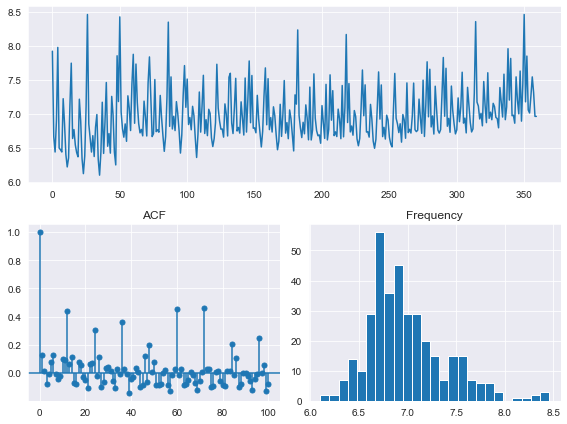

In [26]:
from pmdarima.utils import tsdisplay

fig = tsdisplay(train, lag_max=100, show=False)
# fig.savefig('./images/datatrends11_pmdarima_train_data.png')
# plt.close();
plt.show();

## References
- Kevin Sheppard - Advanced Financial Econometrics
- https://timeseriesreasoning.com/
- https://online.stat.psu.edu/stat510/